In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bw = pd.read_csv('bollywood.csv')

In [3]:
bw.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
bw['Genre'] = bw['Genre'].str.strip()  #takes off white spaces

#### 1. records present in the dataset

In [5]:
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


149 records are present in the dataset

#### 2. Movies that got released in each genre

In [6]:
bw.Genre.value_counts(sort=True)

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

Comedy had the highest number of release with 36

#### 3. Cross tabulation between Genre and ReleaseTime

In [7]:
pd.crosstab(bw.Genre, bw.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


Most movies were seen to be released on a normal season (N) with an average of 19. long weekend(LW), festive season(FS), holiday season(HS) had little or no effect on when the movies were released, an average of 4 movies were released on these seasons.

#### 4. Which month of the year maximum number movie releases are seen?

In [8]:
import datetime
from datetime import datetime

In [9]:
bw['Release Date'] = pd.to_datetime(bw['Release Date'], infer_datetime_format=True)

In [10]:
bw.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [11]:
bw['month'] = bw['Release Date'].dt.month

In [12]:
bw['year'] = bw['Release Date'].dt.year

In [13]:
bw.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,2014


In [14]:
mgrouped = bw.groupby(['month'])

In [15]:
mgrouped['SlNo'].count().reset_index()

,month,SlNo
0,1,20
1,2,16
2,3,19
3,4,11
4,5,18
5,6,10
6,7,16
7,8,8
8,9,10
9,10,9


January, March and May have the highest amount of most released movies while december had the least movie released month with 2 movies

#### 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more

In [16]:
bdh = bw[bw.Budget >= 25] #filtering movies whose budget was greater than or equal to 25 crore

In [17]:
grouped = bdh.groupby(['month'])

In [18]:
budget = grouped['Budget'].sum().reset_index()

In [19]:
budget.nlargest(12, 'Budget')

,month,Budget
7,8,445
9,10,400
0,1,394
1,2,345
10,11,313
4,5,265
6,7,252
5,6,225
2,3,218
8,9,205


The month of August had the highest movie budget with 445 Crore, followed by October and January which had 400 and 394 Crore respectively. The least budgeted movies were seen to be in the month of April, December and September with 136, 175 and 205 Crore respectively

#### 6. Which are the top 10 movies with maximum return on investment (ROI)

In [20]:
#calculate return on investment (ROI) as BoxOfficeCollection - Budget / Budget

In [21]:
bw['ROI'] = (bw['BoxOfficeCollection'] - bw['Budget']) / bw['Budget']

In [22]:
roi = bw.iloc[:, [2,12]] #the colon represent all rows, 2 and 12 represent target columns

In [23]:
roi.nlargest(10,'ROI') #nlargest sort nvalues, in this top 10 ROI. nsmallest is the opposite

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


#### 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times

In [24]:
avg_roi = bw.groupby('ReleaseTime')['ROI'].mean()

In [25]:
avg_roi.reset_index()

,ReleaseTime,ROI
0,FS,0.973853
1,HS,0.850867
2,LW,1.127205
3,N,0.657722


Yes. The movies have higher Return of investment when released on festive seasons or long weekend compared to other release times

#### 8. Draw a histogram and a distribution plot to find out the diistribution of movie budgets. interpret the plot to conclude if the most movies are high or low budget movies.

<AxesSubplot:xlabel='Budget', ylabel='Count'>

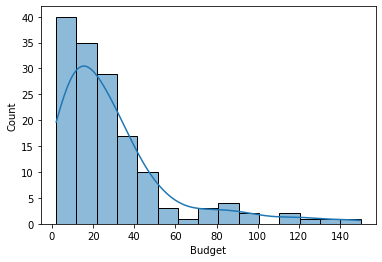

In [26]:
sns.histplot(bw['Budget'], bins=15, kde=True)

The histogram is a positive-skewed, the majority of the data points are clustered towards the left. This means that most movies  were low budget (around 1 to 10 Crore)

<AxesSubplot:xlabel='Budget'>

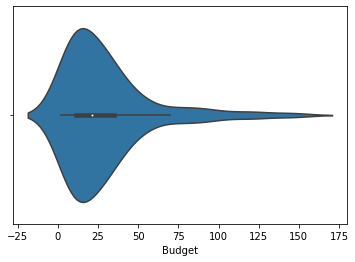

In [27]:
sns.violinplot(x='Budget', data=bw) #distribution plot(violinplot)

From the violin plot, it shows that movies were budgeted around 1 to 20 Crore

#### 9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre is negative?

In [28]:
comedy = bw[bw['Genre'] == 'Comedy']
drama = bw[bw['Genre'] == 'Drama']

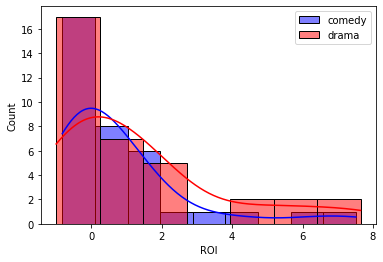

In [29]:
sns.histplot(data= comedy, x='ROI', label='comedy', alpha=0.5, color='blue', kde=True)
sns.histplot(data=drama, x='ROI', label='drama', alpha=0.5, color='red', kde=True)
plt.legend()
plt.show()

Both genre had negative ROIs. This means that there are some movies in these genre that did not perform well financially, and some movies might have incurred losses. In otherwords production costs of some movies were higher than its earnings.
Also, some comedy and drama movies have similar ROIs.

#### 10. Is there a correlation between box office collection and Youtube likes? Is the correlation positive or negative?

In [30]:
boxoffice_youtube = bw[['BoxOfficeCollection', 'YoutubeLikes']] #select the columns

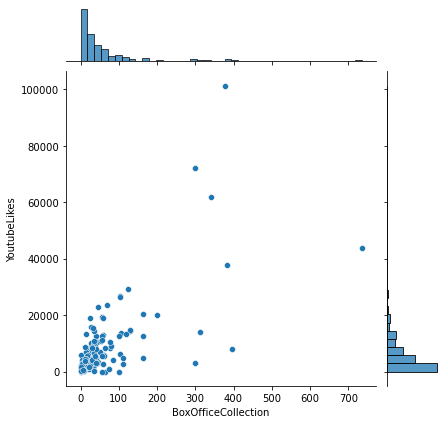

In [31]:
sns.jointplot(x='BoxOfficeCollection', y='YoutubeLikes', data=boxoffice_youtube)

A weak correlation, no clear trend

#### 11. Which genre of movies typically sees more Youtube likes? Draw a boxplot for each genre of movie to compare.

In [32]:
bw_box = bw.loc[:, ['Genre', 'YoutubeLikes']]

In [33]:
bw_box.groupby('Genre').count()

,YoutubeLikes
Genre,
Action,24
Comedy,36
Drama,35
Romance,25
Thriller,29


<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

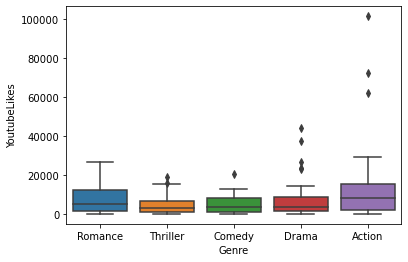

In [34]:
sns.boxplot(x='Genre', y='YoutubeLikes', data=bw_box)

Action has more youtube likes, followed by romance, thriller had the least likes

#### 12. Which of the variables among budget, boxofficecollection, youtubeview, youtubelikes, youtubedislikes, are highly correlated? note: draw a pairplot or heatmap

In [35]:
bw_box =bw.iloc[:, 5:10]

In [36]:
bw_box

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,36,104.00,8576361,26622,2527
1,10,12.00,1087320,1129,137
2,10,4.00,572336,586,54
3,7,0.35,42626,86,19
4,18,10.80,3113427,4512,1224
...,...,...,...,...,...
144,15,30.00,3250917,8185,615
145,13,32.10,5592977,15464,1513
146,32,12.00,2316047,4289,807
147,5,11.89,4674795,3706,762


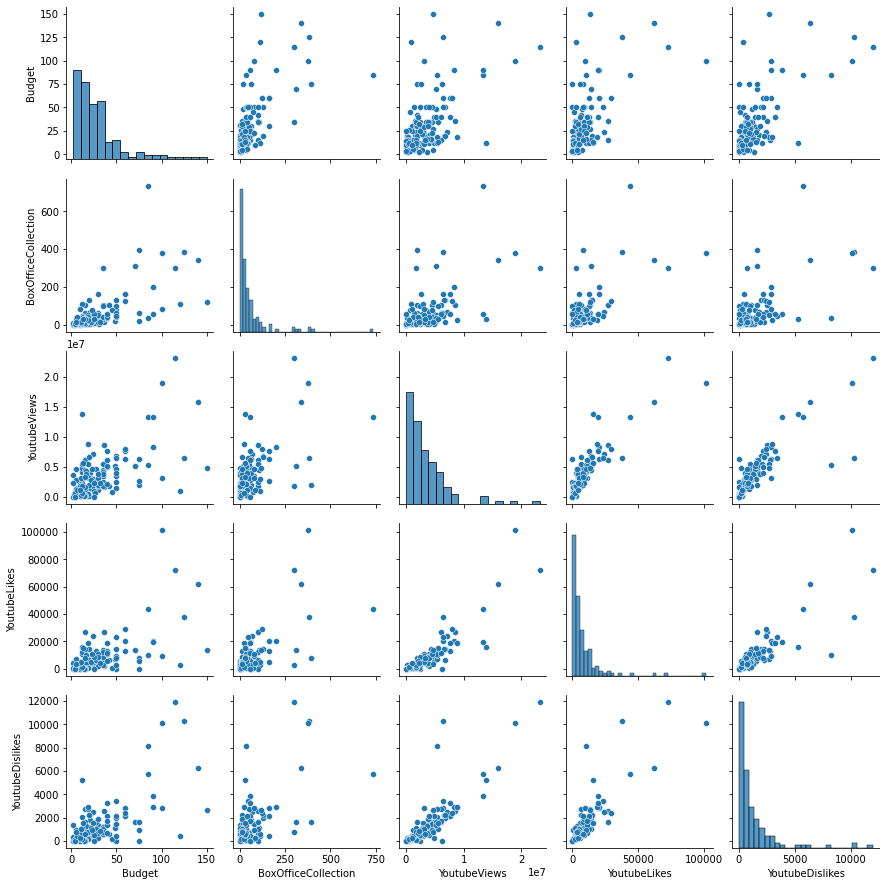

In [37]:
sns.pairplot(data=bw_box)


<AxesSubplot:>

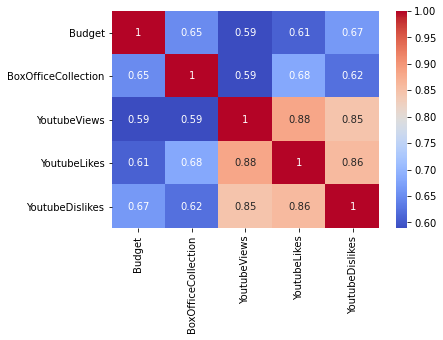

In [38]:
sns.heatmap(bw_box.corr(), annot=True, cmap='coolwarm')

### SECTION TWO

#### 1. categorize the dataset into numerical or categorical

**Numerical:** budget, boxofficecollection, youtubeviews, youtubedislikes, youtubelikes

**Categorical:** slno, releasedate, moviename, releasetime, genre

#### 2. univariate EDA of boxofficecollection

In [39]:
bw['BoxOfficeCollection'].describe()

count    149.000000
mean      55.667248
std       94.494531
min        0.010000
25%        8.780000
50%       28.000000
75%       57.450000
max      735.000000
Name: BoxOfficeCollection, dtype: float64

From this output, we can see that there are 149 data points in this dataset, boxofficecollection ranges from 0.01 to 735 Crore, with a mean of 55.67 Crore and a standard deviation of 94.49 Crore

In [40]:
#visualize the distribution of the boxofficecollection column usiing histogram

Text(0, 0.5, 'Frequency')

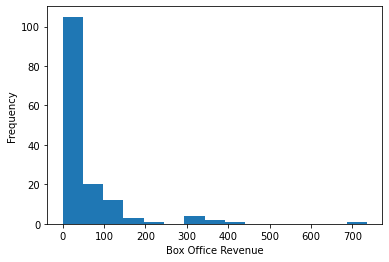

In [41]:
plt.hist(bw['BoxOfficeCollection'], bins=15)
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')

From the histogram, we can see that the majority of movies in the dataset have a box office revenue between 0 and 50 Crore, with a few outliers that have much higher revenue. the distribution is also right-skewed(positively skewed), with a longer tail on the right side of the histogram.

#### 3. Bivariate EDA 

In [42]:
#relationship between the budget and boxoffice collection (graphical)

Text(0, 0.5, 'Box Office Revenue')

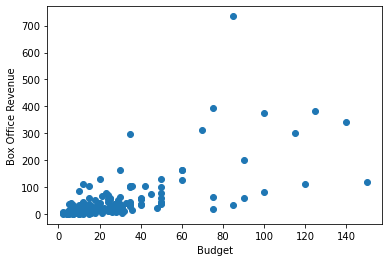

In [43]:
plt.scatter(bw['Budget'], bw['BoxOfficeCollection'])
plt.xlabel('Budget')
plt.ylabel('Box Office Revenue')

From the scatter plot, we can see that there is a positive correlatio between the budget and box office revenue at the box office. This suggest that movie with lower budget tend to earn less revenue at the box office and vice versa.

However, there are also several outliers in the dataset where movies with relatively high budgets have earned less revenue

In [44]:
#non graphical EDA for budget and box office collection

In [45]:
corr_coef = bw['Budget'].corr(bw['BoxOfficeCollection'])

In [46]:
print(corr_coef)

0.65040107485928


This indicates a moderate positive correlation between the budget and boxoffice collection. This means as budget increases, boxoffice revenue tend to increase as well, but the relationship is not perfect

#### 4. Multivariate EDA

In [47]:
#correlation matrix 

<AxesSubplot:>

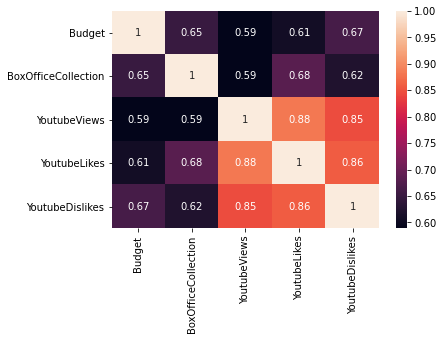

In [48]:
corr_matrix = bw_box.corr()
sns.heatmap(corr_matrix, annot=True)

From the correlation matrix, we can see that there is a strong positive correlation between the budget and boxoffice revenue columns as we observed in the bivariate EDA.

We can also see that there is a positive positive correlation between the number of youtube views and youtube likes as well as a positive correlation between the number of youtube dislikes and the number of youtube likes 